Autoregressive model:
\begin{equation}
x_t = a x_{t-1} + \epsilon_t
\end{equation}

Recursive filter:
\begin{equation}
x_t = \sum_{i=1}^p a_i \epsilon_{t-i} + \epsilon_t
\end{equation}

AR(1) model with normal errors:
\begin{equation}
x_t = a x_{t-1} + \epsilon_t, \qquad \epsilon_t \sim N(0,\sigma^2)
\end{equation}

Time series data:
\begin{equation}
x = [x_{n_0+1}, x_{n_0+2}, \ldots, x_{n_0+n}]
\end{equation}

where $a$ is the autoregressive coefficient, $\epsilon_t$ is the error term at time $t$, $\sigma$ is the standard deviation of the errors, and $n_0$ and $n$ are the number of initial time steps to discard and the number of time steps to generate, respectively.


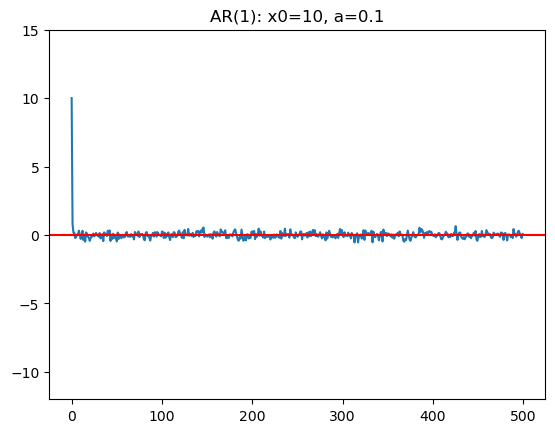

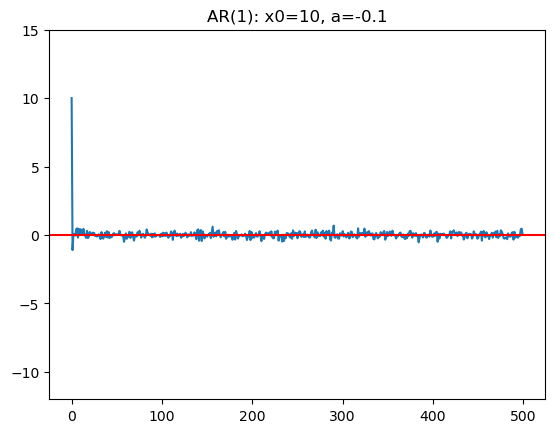

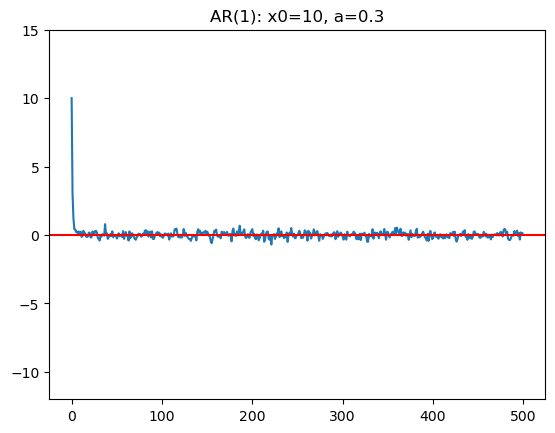

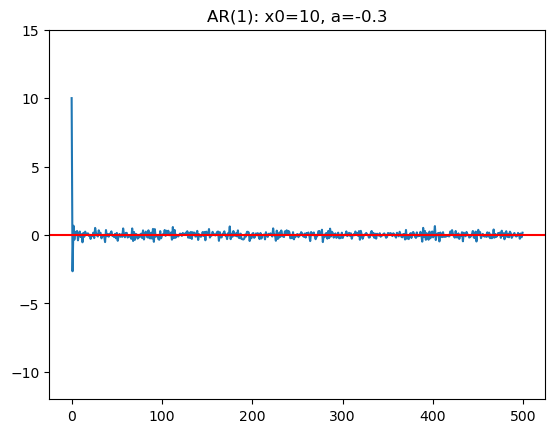

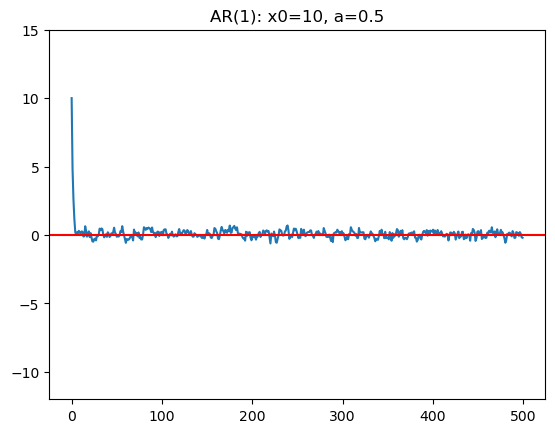

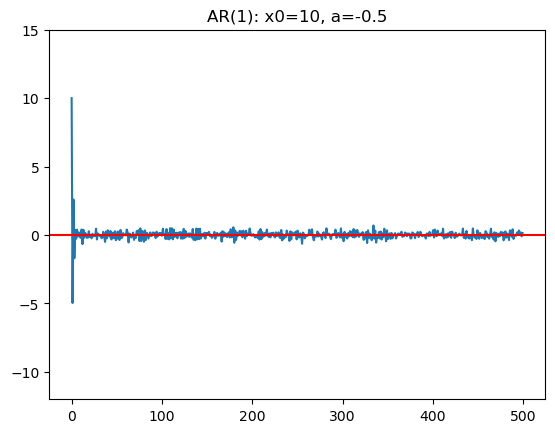

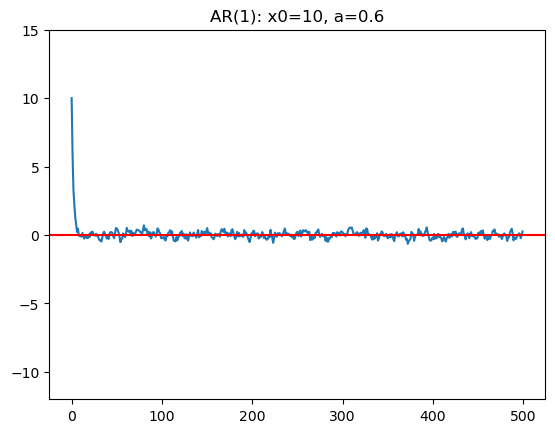

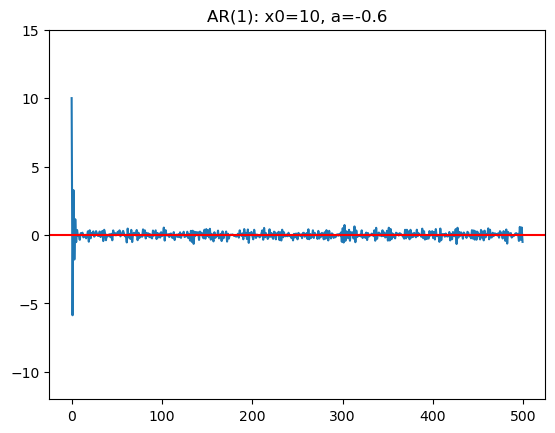

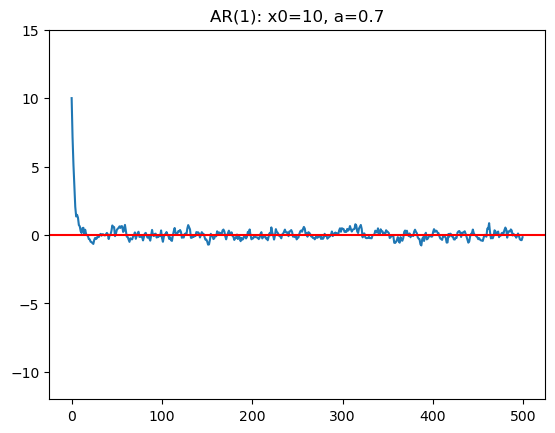

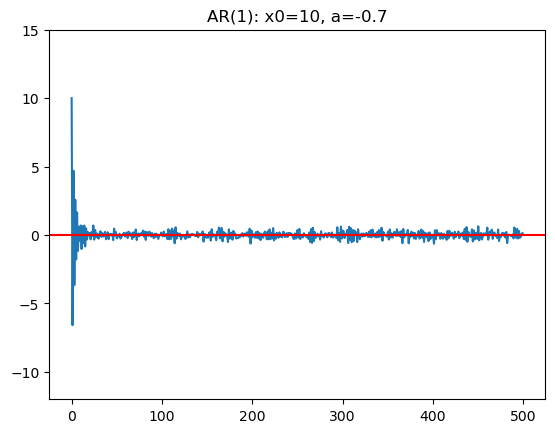

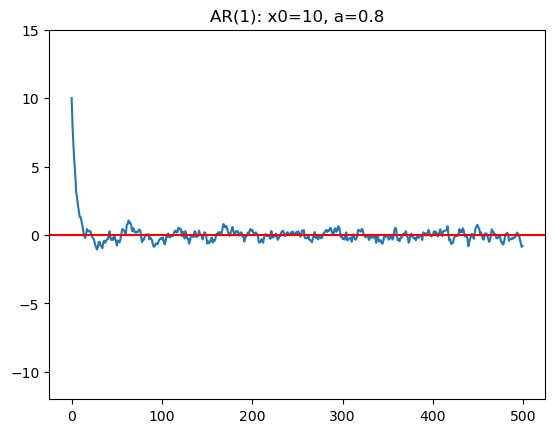

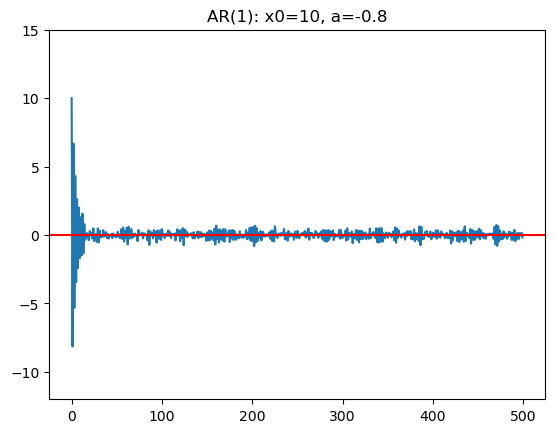

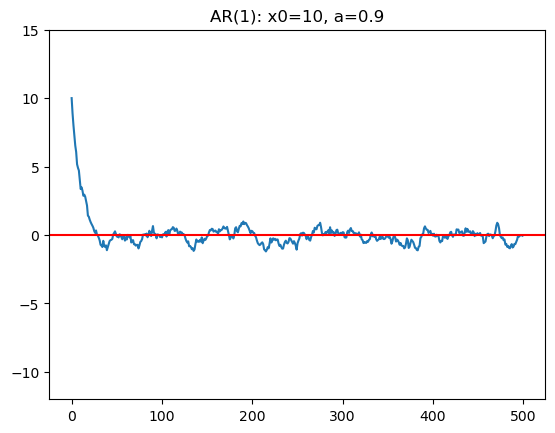

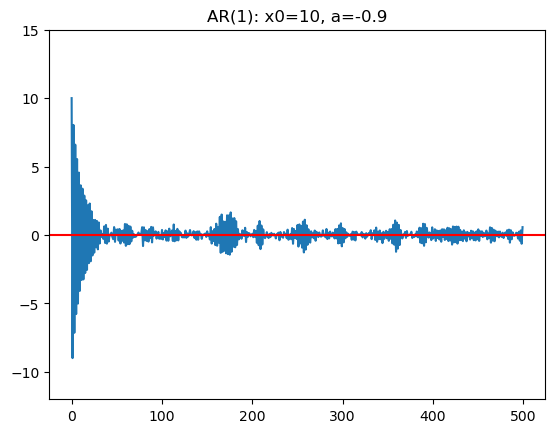

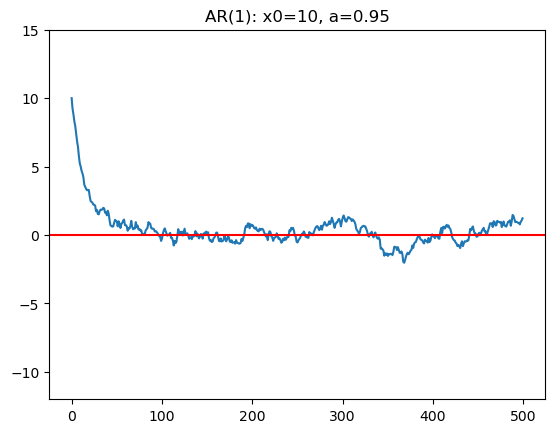

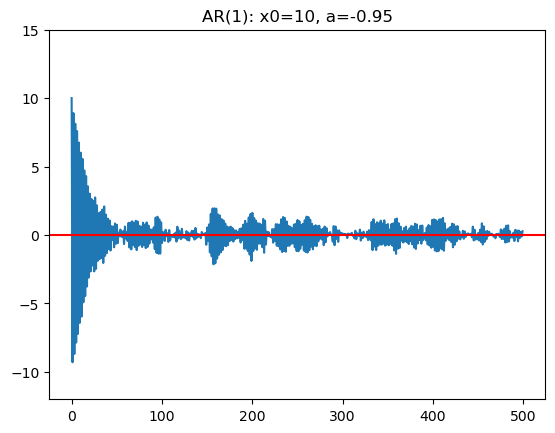

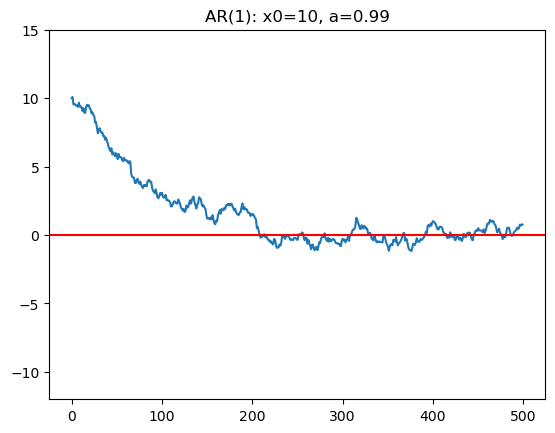

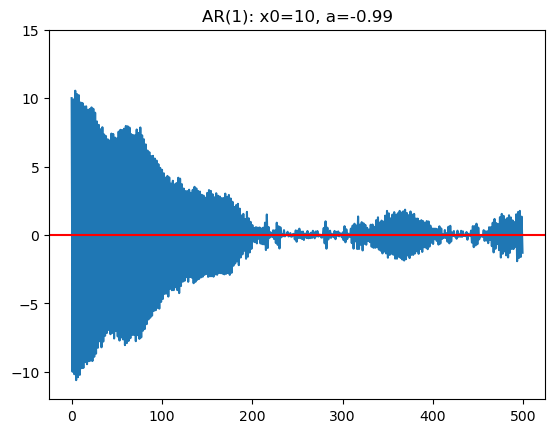

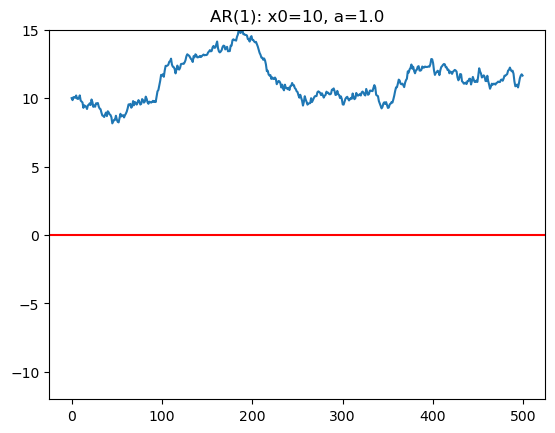

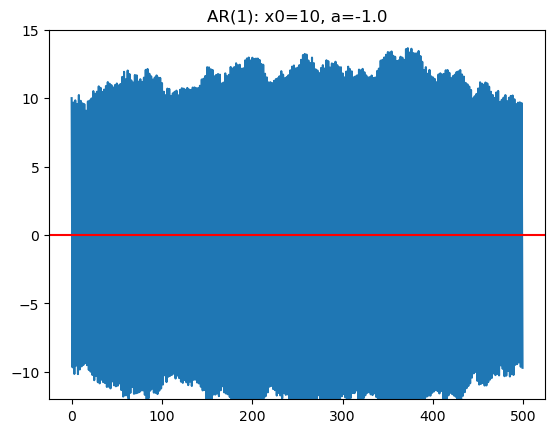

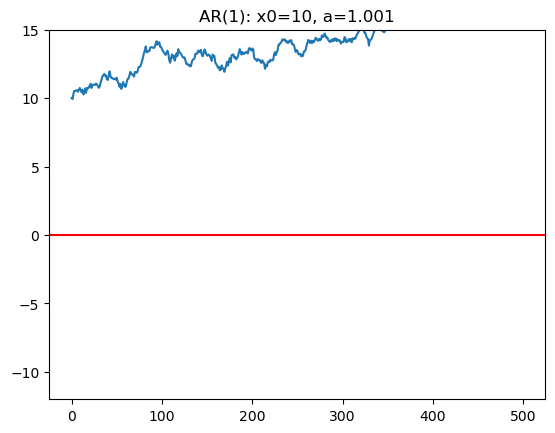

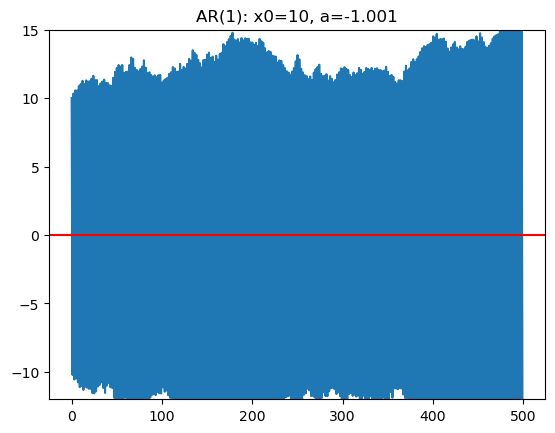

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def ar1_gen(n, a, sigma=1.0, plot_it=False, n0=1000, x0=None):
    """
    1-dim;
    
    Given vector x_0. ONLY use x_o[0] as init.
    Generate from t=0, to t= n+n2;
    Return t in [n0,n2] sub-sequence of len-n;
    """
    n2 = n0 + n
    eps = np.random.normal(0, sigma, n2)
    if x0 is None:
        x0 = np.zeros(n2)
    x2 = np.zeros(n2)
    x2[0] = x0[0]
    for i in range(1, n2):
        x2[i] = a * x2[i-1] + eps[i]
    x = x2[n0:n2]
    x = np.array(x)
    if plot_it:
        plt.plot(x)
        plt.show()
    return x

def demo_ar1():
    as_ = [0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99, 1.0, 1.001]
    x0 = np.array([10])
    n = 500
    for a in as_:
        for a1 in [a, -a]:
            x = ar1_gen(n=n, a=a1, sigma=0.2, n0=0, x0=x0)
            plt.plot(x)
            plt.title(f"AR(1): x0=10, a={a1}")
            plt.ylim(-12, 15)
            plt.axhline(y=0, color='r')
            plt.show()

np.random.seed(106)
demo_ar1()